# Main testing

In [33]:
import gym
import minihack
import numpy as np
import math
import matplotlib.pyplot as plt
import IPython.display as display
from typing import Tuple, List
from utils import *
from algorithms import *
from logic import *

## Creation of the environment

In [34]:
env = gym.make("MiniHack-River-Narrow-v0", observation_keys=("chars", "pixel"))
state = env.reset()
env.render()


Hello Agent, welcome to NetHack!  You are a chaotic male human Rogue.           
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                                                                                
                               ............                                     
                                 .........                                      
                                   .......  }                                   
                                     .....`.}                                   
                          .

Printing the structure of the map and the graphic visualization 

In [35]:
state['chars'].shape, state['pixel'].shape

((21, 79), (336, 1264, 3))

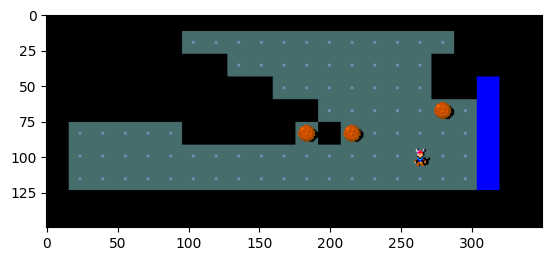

In [36]:
plt.imshow(state['pixel'][100:250, 400:750]) #Immagine ristretta con range [y][x]

In [37]:
game_map = state['chars']
game = state['pixel']

## Finding coordinates
Searching for the coordinates of the player, all the boulders and river

In [38]:
start = get_player_location(game_map)
boulders = get_boulder_locations(game_map)
print("Agent position:", start)


Agent position: (12, 41)


Coordinates of each block present in the map

In [39]:
print("Boulders positions: ", boulders)

Boulders positions:  [(10, 42), (11, 36), (11, 38)]


Calculating the distance to the shortest boulder, which may be not the best to push becouse doesn't consider also the distance to the river

In [40]:
target_block_position, distance = get_min_distance_point_to_points(start[0],start[1],boulders)
print("Target position:", target_block_position, "Distance:", distance)

Target position: [10, 42] Distance: 2


### Finding river positions

In [41]:
river_positions = get_river_locations(game_map)
print("River positions: ", river_positions)

River positions:  [(9, 44), (10, 44), (11, 44), (12, 44), (13, 44)]


## Complete path player - boulder - river

1) A star calculates the path from the player to the optimal boulder to push
2) A star calculates the path from the boulder reached to the nearest river position

## Path boulder to river

Calculating the coordinates of the best boulder to push

In [42]:
coordinates_min_boulder = get_best_global_distance(start, boulders, river_positions)
print("Coordinates of the best boulder to push: ",coordinates_min_boulder)
#pushing_position = position_for_boulder_push(coordinates_min_boulder, )

[(10, 42, 4), (11, 36, 13), (11, 38, 9)]
Coordinates of the best boulder to push:  (10, 42)


## Path Boulder -> River
Calculating the path from the boulder to the river shortest distance

In [43]:
temp = get_min_distance_point_to_points(coordinates_min_boulder[0],coordinates_min_boulder[1], river_positions)
final_position = tuple(temp[0])

print("Boulders coordinates:",coordinates_min_boulder,"River position: ", final_position)

path_boulder_river = a_star(game,game_map, coordinates_min_boulder, final_position, get_optimal_distance_point_to_point)

path_boulder_river.append(final_position) #Adding the river final position, otherwise will drop the boulder near the river but not in the river

print("Path from boulder to river: ",path_boulder_river)

Boulders coordinates: (10, 42) River position:  (10, 44)
Target found!
Path from boulder to river:  [(10, 42), (10, 43), (10, 44)]


Calculating the position in which the agent have to be in order to push correctly the boulder into the river

In [44]:
pushing_position = position_for_boulder_push(coordinates_min_boulder, path_boulder_river[1])[1]#path_boulder_river[1] is the position of the second step of the boulder
print("Pushing position: ", pushing_position)

Pushing position:  (10, 41)


## Path Player -> Boulder pushing position

In [45]:
path_player_to_pushing_position = a_star(game,game_map, start, pushing_position, get_optimal_distance_point_to_point)
#path_player_to_pushing_position.append(pushing_position) #append the pushing position otherwise is near the correct cell and not in the cell
print("Path from the start to the pushing position: ",path_player_to_pushing_position)

Target found!
Path from the start to the pushing position:  [(12, 41), (11, 41)]


Given the path of the boulder to the river we generated the path that the agent has to do in order to "stay attached" to the boulder and pushing it into the river

In [46]:

agent_actions,path_player_to_river = push_boulder_path(path_boulder_river)
print("Agent path: ", path_player_to_river)


[(10, 41), (10, 42), (10, 43)]
Agent path:  [(10, 41), (10, 42), (10, 43)]


Merging the two path together

In [47]:
if(path_player_to_pushing_position is not None):
    if(path_player_to_river is not None):
        agent_full_path = path_player_to_pushing_position + path_player_to_river
    else:
        agent_full_path = path_player_to_pushing_position
else:
    if(path_player_to_river is not None):
        agent_full_path = path_player_to_river
    else:
        agent_full_path = None



print("Full path of the agent: ",agent_full_path)

Full path of the agent:  [(12, 41), (11, 41), (10, 41), (10, 42), (10, 43)]


## Visualization of the execution
Showing the animated path from start to finish

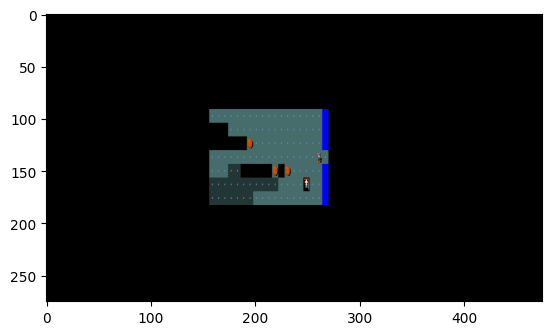

In [48]:
actions, names = actions_from_path(start, agent_full_path) 
#player_pos = plot_animated_sequence(env,game, game_map,actions[1:]) #Remove first action because it is the start position

##Dictionary containing the gamestate ready to be saved
gamestate = {}
gamestate['start'] = start
gamestate['game'] = game
gamestate['env'] = env
gamestate['game_map'] = game_map
gamestate['actions'] = actions[1:]
gamestate['names'] = names[1:]
gamestate['boulders_list'] = boulders
gamestate['river_positions'] = river_positions
gamestate['coordinates_min_boulder'] = coordinates_min_boulder
gamestate['final_position'] = final_position
gamestate['path_boulder_river'] = path_boulder_river
gamestate['path_player_to_pushing_position'] = path_player_to_pushing_position
gamestate['agent_full_path'] = agent_full_path

player_pos = plot_and_save_sequence(gamestate)
#player_pos = plot_animated_sequence(env,game, game_map,actions[1:]) #Remove first action because it is the start position
